## Manuell

In [1]:
import numpy as np

- Natürliche Zahlen
- Ganze Zahlen
- Rationale Zahlen
- Rationale Zahlen und Irrationale Zahlen - > R
- Complexe Zahlen (Quantum Comp und Frequenz-Analyse) -> C schliesst R ein

In [2]:
X = np.random.randint(1, 100, 10)
X = np.array(X).astype(np.float32)

In [3]:
X

array([98., 69., 22., 96., 21., 42., 30., 12., 85., 40.], dtype=float32)

In [4]:
# X = np.arange(1,20).astype(np.float32)
X.sort()
X

array([12., 21., 22., 30., 40., 42., 69., 85., 96., 98.], dtype=float32)

In [5]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [6]:
# List comprehension
m = 5
b = 10
Y = [m*x + b for x in X]
print(Y)

[np.float32(70.0), np.float32(115.0), np.float32(120.0), np.float32(160.0), np.float32(210.0), np.float32(220.0), np.float32(355.0), np.float32(435.0), np.float32(490.0), np.float32(500.0)]


Wir erstellen hier eine Liste.
[   ]

2*x + 6 für jedes Element x in X

In [7]:
len(X)

10

(m_deriv
b_deriv)
m_deriv ist die partielle Ableitung nach m (Gewicht)
b_deriv ist --- nach b (Bias)

$MSE = 1/N\sum_{i=0} ^N (Y_i - (mX_i + b))^2$





In [8]:
def update_weights(m, b, X, Y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    # Ableitung MSE
    for i in range(N): # pytorch - backward # gradient tape
        # (z.b. y = 3x +5z + 10)

        # Calculate partial derivatives
        # -x (innere Ableitung) * 2(y - (mx + b)) (äussere Ableitung)
        m_deriv += -2*X[i] * (Y[i] - (m*X[i] + b))

        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X[i] + b))

#m1_deriv += -X_1[i] * (Y[i] - (m*X[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate # später - in pytorch step
    b -= (b_deriv / float(N)) * learning_rate
    history_m.append(m)
    history_b.append(b)

    return m,b


In [9]:
def train(epochs, learning_rate:int)-> tuple[float, float]:
    m=0
    b=0
    for epoch in range(epochs):
        # abbruchskriterium - "early stopping"
        m,b = update_weights(m, b, X, Y, learning_rate)
        if epoch%200==0:
          print(f"Epoch: {epoch}, m: {m}, b: {b}")
    return m,b

In [10]:
epochs = 10000000
history_m = []
history_b = []

In [11]:
train(epochs, learning_rate=1e-4)

Epoch: 0, m: 3.716899871826172, b: 0.05350000038743019
Epoch: 200, m: 5.1399664878845215, b: 0.17887720465660095
Epoch: 400, m: 5.138484954833984, b: 0.2828396260738373
Epoch: 600, m: 5.13701868057251, b: 0.38570159673690796
Epoch: 800, m: 5.135568618774414, b: 0.48747459053993225
Epoch: 1000, m: 5.134133338928223, b: 0.5881702303886414
Epoch: 1200, m: 5.132713317871094, b: 0.6878001093864441
Epoch: 1400, m: 5.131308555603027, b: 0.7863753437995911
Epoch: 1600, m: 5.129918575286865, b: 0.8839071989059448
Epoch: 1800, m: 5.128543376922607, b: 0.9804065227508545
Epoch: 2000, m: 5.127182960510254, b: 1.0758841037750244
Epoch: 2200, m: 5.125836372375488, b: 1.1703509092330933
Epoch: 2400, m: 5.124504566192627, b: 1.2638182640075684
Epoch: 2600, m: 5.1231865882873535, b: 1.3562959432601929
Epoch: 2800, m: 5.121882438659668, b: 1.4477945566177368
Epoch: 3000, m: 5.12059211730957, b: 1.5383247137069702
Epoch: 3200, m: 5.1193156242370605, b: 1.6278961896896362
Epoch: 3400, m: 5.118052959442139

(np.float32(5.0001283), np.float32(9.991013))

In [12]:
history_m[500]

np.float32(5.13775)

In [13]:
history_b[1999]

np.float32(1.0754093)

In [14]:
import matplotlib.pyplot as plt
plt.rcdefaults()
from pylab import rcParams
%matplotlib inline

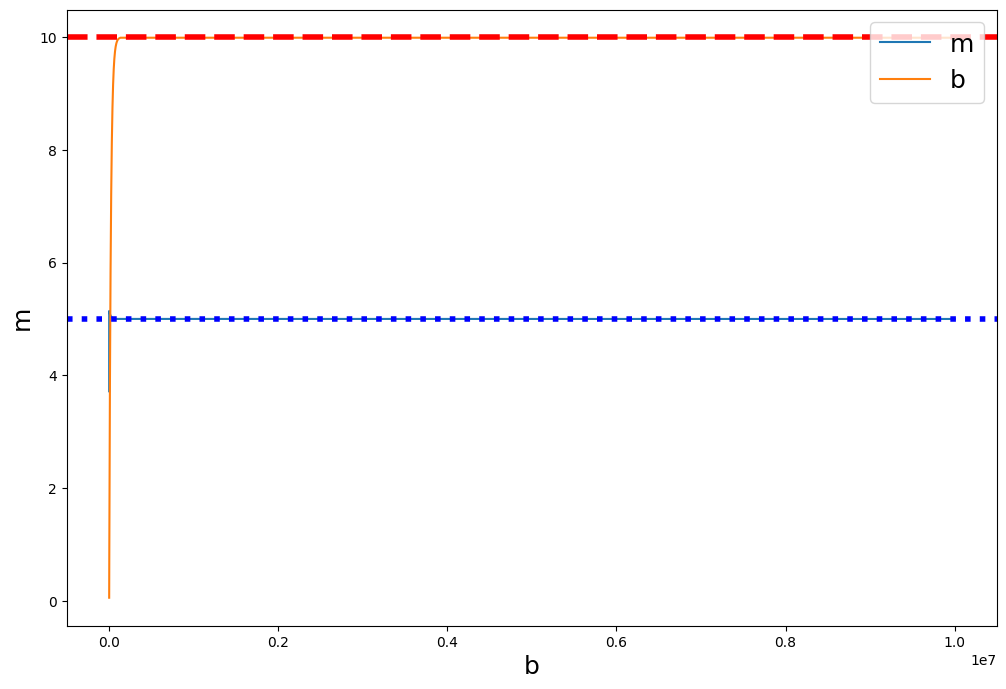

In [15]:

plt.figure(figsize=(12,8))
plt.plot(history_m[0:epochs])
plt.plot(history_b[0:epochs])

plt.axhline(y=b, xmin=0, xmax=epochs, c='r', linewidth=4,linestyle='--')
plt.axhline(y=m, xmin=0, xmax=epochs, c='b', linewidth=4, linestyle=':')
plt.ylabel('m',fontsize= 18)
plt.xlabel('b',fontsize= 18)
plt.legend(['m', 'b'], loc='upper right', fontsize= 18);

In [16]:
import torch
from torch import nn

In [17]:
X, Y

(array([12., 21., 22., 30., 40., 42., 69., 85., 96., 98.], dtype=float32),
 [np.float32(70.0),
  np.float32(115.0),
  np.float32(120.0),
  np.float32(160.0),
  np.float32(210.0),
  np.float32(220.0),
  np.float32(355.0),
  np.float32(435.0),
  np.float32(490.0),
  np.float32(500.0)])

## Mit PyTorch

### Aufgabe 1:
1. Eigene function definieren mit ZWEI vars
2. Andere X und Y werte
3. LR varieren und das training beobachten (zu hohe, zu niedrige LR)
  - Macht ein LR range [from, to] - z.B. for loop
  - nimmt das beste LR (minimaler Loss, keine NaNs)
  - "Grid Search"
4. Plot die wahre und die predictete Funtionen gegeneinander

In [18]:
# -*- coding: utf-8 -*-
import torch
import math

dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x_1 = torch.linspace(1, 10, 10, dtype=dtype) /10
x_2 = torch.linspace(11, 20, 10, dtype=dtype) /20

y = 2*x_1 + 3*x_2 + 6

# Create random Tensors for weights.
# 2 weights: a and b
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a_1 = torch.randn((), dtype=dtype, requires_grad=True)
a_2 = torch.randn((), dtype=dtype, requires_grad=True)

b = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-3
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a_1*x_1 + a_2*x_2 + b

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 0:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a_1 -= learning_rate * a_1.grad
        a_2 -= learning_rate * a_2.grad

        b -= learning_rate * b.grad


        # Manually zero the gradients after updating weights
        a_1.grad = None
        a_2.grad = None

        b.grad = None


print(f'Result: y = {a_1.item()} x_1 + {a_2.item()} x_2 + {b.item()} x')

0 936.9501342773438
100 1.6121184825897217
200 0.9873599410057068
300 0.7650418281555176
400 0.5928544998168945
500 0.45942002534866333
600 0.35601890087127686
700 0.27588915824890137
800 0.21379438042640686
900 0.16567683219909668
1000 0.12838777899742126
1100 0.09949123114347458
1200 0.07709838449954987
1300 0.05974589288234711
1400 0.04629889130592346
1500 0.035878539085388184
1600 0.027803389355540276
1700 0.02154572121798992
1800 0.016696132719516754
1900 0.012938412837684155
Result: y = 1.292175054550171 x_1 + 4.6338067054748535 x_2 + 5.1185173988342285 x


## Mit PyTorch und für komplexe nicht-lineare Funktion


### Aufgabe 2
1. Define own non-linear function
2. 5 weights y = a + b x + c x^2 + d x^3 +c x^4
3. In case grade 4 is not enough, try grade 5
4. Plot the results in each case real function vs approximation

In [19]:
# -*- coding: utf-8 -*-
import torch
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Final_data.csv')

df = df[["Weight (kg)", "Age", "Calories_Burned", "Height (m)"]]

scaler = MinMaxScaler()
scaler.fit(df.values)
dfScaled = scaler.transform(df.values)

# print (df)

x_1 = torch.Tensor(dfScaled[:,1])
x_2 = torch.Tensor(dfScaled[:,2])
x_3 = torch.Tensor(dfScaled[:,3])


y = torch.Tensor(dfScaled[:,0])



dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)


# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.

a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

print(a, b, c, d)

learning_rate = 1e-5
for t in range(50000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = b* x_1 + c * x_2 + d * x_3 + a

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print("step:", t, "loss:", loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

    #if t % 200 == 0:
        #print(f"step {t:4d}  loss {loss.item():.6f}")

print(f'Result: y = {b.item()} + {c.item()} x + {d.item()} x^2 + {a.item()} x^3')
print(a.grad, b.grad, c.grad, d.grad)

tensor(0.5343, requires_grad=True) tensor(0.2154, requires_grad=True) tensor(-0.6048, requires_grad=True) tensor(1.1681, requires_grad=True)
step: 99 loss: 957.0947265625
step: 199 loss: 934.8539428710938
step: 299 loss: 933.9964599609375
step: 399 loss: 933.9425659179688
step: 499 loss: 933.9383544921875
step: 599 loss: 933.93798828125
step: 699 loss: 933.9380493164062
step: 799 loss: 933.93798828125
step: 899 loss: 933.93798828125
step: 999 loss: 933.93798828125
step: 1099 loss: 933.9379272460938
step: 1199 loss: 933.93798828125
step: 1299 loss: 933.93798828125
step: 1399 loss: 933.93798828125
step: 1499 loss: 933.93798828125
step: 1599 loss: 933.93798828125
step: 1699 loss: 933.93798828125
step: 1799 loss: 933.93798828125
step: 1899 loss: 933.93798828125
step: 1999 loss: 933.93798828125
step: 2099 loss: 933.93798828125
step: 2199 loss: 933.93798828125
step: 2299 loss: 933.93798828125
step: 2399 loss: 933.93798828125
step: 2499 loss: 933.93798828125
step: 2599 loss: 933.93798828125
s

In [20]:
# AI fix with device missmatch and model missmatch
# -*- coding: utf-8 -*-
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Optional: reproducibility
torch.manual_seed(42)

# Load and scale data
df = pd.read_csv('Final_data.csv')
df = df[["Weight (kg)", "Age", "Calories_Burned", "Height (m)"]].dropna()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.values)

# Split features and target (scaled space)
X_np = scaled[:, 1:4].astype('float32')  # Age, Calories_Burned, Height(m)
y_np = scaled[:, 0:1].astype('float32')  # Weight

# Select device first, then create tensors on it
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = torch.tensor(X_np, device=device)  # shape [N, 3]
y = torch.tensor(y_np, device=device)  # shape [N, 1]
N, D = X.shape

# Parameters: linear model w (D,1) and bias b (1)
w = torch.randn(D, 1, device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

# Optimizer and loss
optimizer = torch.optim.Adam([w, b], lr=1e-2)
loss_fn = torch.nn.MSELoss()

# Train
for t in range(3000):
    y_pred = X @ w + b  # [N,1]
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    if t % 200 == 0:
        print(f"step {t:4d}  loss {loss.item():.6f}")

# Report learned linear model on scaled features
a = float(b.detach().cpu())
coef = w.detach().cpu().numpy().ravel()
print(
    f"Model (scaled): y = {a:.6f} + {coef[0]:.6f}*Age + {coef[1]:.6f}*Calories_Burned + {coef[2]:.6f}*Height"
)

step    0  loss 0.062393
step  200  loss 0.046697
step  400  loss 0.046697
step  600  loss 0.046697
step  800  loss 0.046697
step 1000  loss 0.046697
step 1200  loss 0.046697
step 1400  loss 0.046697
step 1600  loss 0.046697
step 1800  loss 0.046697
step 2000  loss 0.046697
step 2200  loss 0.046697
step 2400  loss 0.046697
step 2600  loss 0.046697
step 2800  loss 0.046697
Model (scaled): y = 0.244462 + -0.024746*Age + -0.006983*Calories_Burned + 0.333719*Height


step    0  loss 0.062393
step  200  loss 0.046697
step  400  loss 0.046697
step  600  loss 0.046697
step  800  loss 0.046697
step 1000  loss 0.046697
step 1200  loss 0.046697
step 1400  loss 0.046697
step 1600  loss 0.046697
step 1800  loss 0.046697
step 2000  loss 0.046697
step 2200  loss 0.046697
step 2400  loss 0.046697
step 2600  loss 0.046697
step 2800  loss 0.046697
Model (scaled): y = 0.244462 + -0.024746*Age + -0.006983*Calories + 0.333719*Height


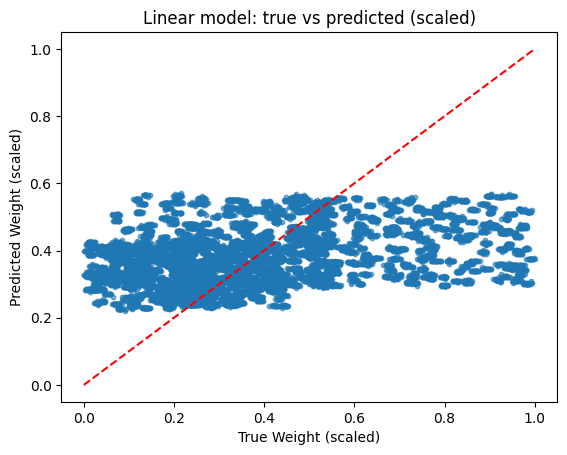

In [21]:
# AI fix with device missmatch and model missmatch optimizations and graph
# -*- coding: utf-8 -*-
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Reproducibility
torch.manual_seed(42)

# 1) Read and scale
df = pd.read_csv('Final_data.csv')
# Target: Weight; Inputs: Age, Calories_Burned, Height
cols = ["Weight (kg)", "Age", "Calories_Burned", "Height (m)"]
df = df[cols].dropna()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.values)

# 2) Split into X (3 features) and y (target)
X_np = scaled[:, 1:4]   # Age, Calories, Height  => shape [N, 3]
y_np = scaled[:, 0:1]   # Weight                 => shape [N, 1]

# 3) Device first, then tensors
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = torch.tensor(X_np, dtype=torch.float32, device=device)
y = torch.tensor(y_np, dtype=torch.float32, device=device)
N, D = X.shape

# 4) Parameters: weights w (D,1) and bias b (1)
w = torch.randn(D, 1, device=device, requires_grad=True)
b = torch.zeros(1, device=device, requires_grad=True)

# 5) Optimizer and loss
optimizer = torch.optim.Adam([w, b], lr=1e-2)
loss_fn = torch.nn.MSELoss()

# 6) Training
for t in range(3000):
    y_pred = X @ w + b                   # [N,1]
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    if t % 200 == 0:
        print(f"step {t:4d}  loss {loss.item():.6f}")

# 7) Report learned linear model
w_cpu = w.detach().cpu().numpy().ravel()
b_cpu = float(b.detach().cpu())
print(f"Model (scaled): y = {b_cpu:.6f} + {w_cpu[0]:.6f}*Age + {w_cpu[1]:.6f}*Calories + {w_cpu[2]:.6f}*Height")

# Optional: plot predicted vs actual in scaled space
with torch.no_grad():
    yhat = (X @ w + b).cpu().numpy().ravel()

y_true = y.cpu().numpy().ravel()
plt.scatter(y_true, yhat, s=10, alpha=0.6)
plt.xlabel('True Weight (scaled)')
plt.ylabel('Predicted Weight (scaled)')
plt.title('Linear model: true vs predicted (scaled)')
plt.plot([0,1],[0,1], 'r--')
plt.show()

## Mit PyTorch und nn module

### Aufgabe 3 (wenn 1 und 2 fertig sind) - optional
1. Wie Augabe 2 nur mit nn lösen (d.h. zu approximierende Funktion, gleiche Werte, gleicher Polynom) - nur alles mit nn alalog dem Bespiel unten

2. Loss während dem Training plotten

In [22]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [23]:
x.shape

torch.Size([2000])

In [24]:
# p = torch.tensor([1, 2, 3])
x.unsqueeze(-1).shape

torch.Size([2000, 1])

In [25]:
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [26]:
fc = torch.nn.Linear(3, 1)
fc(xx).shape

torch.Size([2000, 1])

In [27]:
flat = torch.nn.Flatten(0,1)

In [28]:
out = fc(xx)
out.shape

torch.Size([2000, 1])

In [29]:
flat(out).shape

torch.Size([2000])

In [30]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Final_data.csv')

df = df[["Weight (kg)", "Age", "Calories_Burned", "Height (m)"]]

scaler = MinMaxScaler()
scaler.fit(df.values)
dfScaled = scaler.transform(df.values)

# print (df)

x_1 = torch.Tensor(dfScaled[:,1])
x_2 = torch.Tensor(dfScaled[:,2])
x_3 = torch.Tensor(dfScaled[:,3])
# Split features and target (scaled space)
X_np = dfScaled[:, 1:4].astype('float32')  # Age, Calories_Burned, Height
y_np = dfScaled[:, 0:1].astype('float32')  # Weight (as column)

# Device alignment
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = torch.tensor(X_np, device=device)  # [N, 3]
y = torch.tensor(y_np, device=device)  # [N, 1]


# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 20), # anzahl der spalten
    torch.nn.ReLU(),
    torch.nn.Linear(20, 1), # 20 frei
    # torch.nn.Flatten(0, 1), # schauen ob benoetigt
)

x = torch.stack((x_1, x_2, x_3), dim=1)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(X)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 1103.609130859375
199 1053.5712890625
299 1020.5838623046875
399 997.0479125976562
499 979.6060791015625
599 966.5062255859375
699 956.5248413085938
799 948.9141845703125
899 943.0791015625
999 938.510009765625
1099 934.97021484375
1199 932.1624145507812
1299 929.958740234375
1399 928.17724609375
1499 926.740234375
1599 925.5708618164062
1699 924.65576171875
1799 923.91064453125
1899 923.2848510742188
1999 922.755859375


RuntimeError: a Tensor with 20 elements cannot be converted to Scalar

step    0  loss 0.327870
step  200  loss 0.047369
step  400  loss 0.046698
step  600  loss 0.046697
step  800  loss 0.046697
step 1000  loss 0.046697
step 1200  loss 0.046697
step 1400  loss 0.046697
step 1600  loss 0.046697
step 1800  loss 0.046697


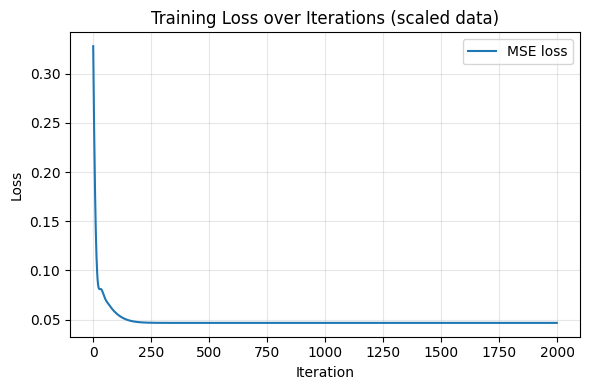

In [31]:
# -*- coding: utf-8 -*-
import torch
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Reproducibility (optional)
torch.manual_seed(42)

# Load and scale data
df = pd.read_csv('Final_data.csv')
df = df[["Weight (kg)", "Age", "Calories_Burned", "Height (m)"]].dropna()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df.values)

# Split features and target (scaled space)
X_np = scaled[:, 1:4].astype('float32')  # Age, Calories_Burned, Height
y_np = scaled[:, 0:1].astype('float32')  # Weight (as column)

# Device alignment
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = torch.tensor(X_np, device=device)  # [N, 3]
y = torch.tensor(y_np, device=device)  # [N, 1]

# Simple linear model
model = torch.nn.Linear(3, 1).to(device)

# Optimizer and loss
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = torch.nn.MSELoss()

# Train
loss_history = []
for t in range(2000):
    y_pred = model(X)            # [N, 1]
    loss = loss_fn(y_pred, y)
    loss_history.append(loss.item())

    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

    if t % 200 == 0:
        print(f"step {t:4d}  loss {loss.item():.6f}")

# Plot training loss instead of printing model coefficients
plt.figure(figsize=(6,4))
plt.plot(range(len(loss_history)), loss_history, label='MSE loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations (scaled data)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## ...mit einem Optimizer

### Aufgabe 4 (wenn 1, 2 und fertig sind) - optional
1. Wie Augabe 3 nur mit nn **und Optimizer** lösen
2. Loss während dem Training plotten und mit dem Plot von Aufgabe 3 vergleichen
3. BONUS: Adam, RMSprop, SGD

In [40]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 3056.904296875
199 1460.5716552734375
299 747.2015991210938
399 446.1299743652344
499 292.376220703125
599 189.6526336669922
699 119.53053283691406
799 71.82603454589844
899 40.52210235595703
999 21.870357513427734
1099 12.679405212402344
1199 9.47196102142334
1299 8.900775909423828
1399 8.918525695800781
1499 8.926499366760254
1599 8.90151596069336
1699 8.901281356811523
1799 8.910375595092773
1899 8.913537979125977
1999 8.920600891113281
Result: y = 0.0005211547832004726 + 0.8572376370429993 x + 0.0005442301044240594 x^2 + -0.0928334966301918 x^3
